# 動手實驗：手寫數字識別

## 從sklearn導入MNIST數據集

In [72]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()     # 數據加載

In [73]:
dir(digits)     # 查看數據結構

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

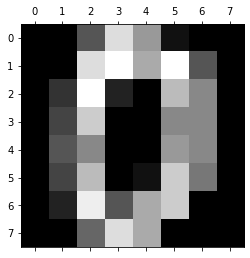

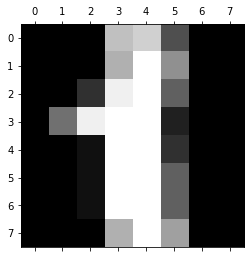

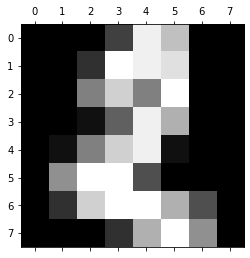

In [75]:
plt.gray() 
for i in range(3):
    plt.matshow(digits.images[i])     # 查看圖片文件

In [76]:
df = pd.DataFrame(digits.data)     # 創建數據幀
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [77]:
df['target'].value_counts().sort_index()     # 統計標籤個數

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: target, dtype: int64

In [78]:
!pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

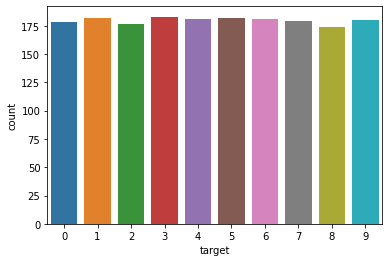

In [79]:
import seaborn as sns
sns.countplot(df['target'])     # 顯示標籤分佈

In [80]:
X = df.drop('target',axis='columns')     # 設置輸入變量
y = df.target                            # 設置輸出

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)     # 劃分訓練集和測試集

## 算法实验1: ID3

In [82]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5)     # 設置分類標準和深度
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [83]:
dtree.score(X_test, y_test)     # 計算準確率評分

0.7537037037037037

In [84]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth" : [5, 10, 15, 20, 25, 30],     #設置參數範圍
             }
# 自動調參
grid = GridSearchCV(dtree,
                    parameters, n_jobs=-1,
                    scoring="accuracy",
                    cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5),
             n_jobs=-1, param_grid={'max_depth': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [85]:
grid.best_params_, grid.best_score_     # 查看最佳參數及評分

({'max_depth': 25}, 0.8305489260143197)

## 算法实验2: Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1)     #設置樹的最大深度，樹的個數，使用全部cpu
RFclf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1)

In [87]:
RFclf.score(X_test, y_test)     # 計算準確率評分

0.8870370370370371

In [88]:
parameters = {"max_depth" : [5, 10, 15, 20],     #設置參數範圍
              "n_estimators": [5, 10, 15, 20, 25, 30],
             }
# 自動調參
grid = GridSearchCV(RFclf,
                    parameters, n_jobs=-1,
                    scoring="accuracy",
                    cv=3)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=10,
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [89]:
grid.best_params_, grid.best_score_     # 查看最佳參數及評分

({'max_depth': 10, 'n_estimators': 25}, 0.9634049323786794)

## 算法实验3: XGBoost

In [90]:
!pip install xgboost     # 首次運行時，你需要安裝

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [91]:
from xgboost.sklearn import XGBClassifier

In [92]:
XGBclf = XGBClassifier(
                        learning_rate= 0.2,      # 學習率
                        max_depth=6,             # 構建樹的深度，越大越容易過擬合
                        gamma=0.1,               # 樹的葉子節點上作進一步分區所需的最小損失減少,越大越保守，一般0.1、0.2
                        subsample=0.7,           # 隨機採樣訓練樣本 訓練實例的子採樣比
                        colsample_bytree=0.7,    # 生成樹時進行的列採樣 
                        reg_lambda=1,            # 控制模型複雜度的權重值的L2正則化項參數，參數越大，模型越不容易過擬合。
                        reg_alpha=1,             # L1正則項參數
                        objective= 'multi:softmax',  #多分類的問題
                        num_class=10,            # 類別數，多分類與multi:softmax並用
                        n_estimators=100,        #樹的個數
                        seed=123                 #隨機種子
)

In [93]:
XGBclf.fit(X_train, y_train, eval_metric='auc')

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_class=10, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=123,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=None, seed=123,
              subsample=0.7, tree_method='exact', validate_parameters=1, ...)

In [94]:
preds = XGBclf.predict(X_test)

In [95]:
print(preds)

[3 3 4 4 1 3 1 0 7 4 0 6 5 1 6 0 3 1 0 6 9 7 7 5 4 5 7 0 0 9 1 6 8 6 1 4 6
 2 1 6 0 6 2 0 2 3 1 8 8 1 2 8 6 5 1 6 4 6 0 4 3 5 6 2 8 8 8 2 0 1 7 9 4 7
 3 9 4 3 3 8 9 5 4 6 1 2 4 2 4 5 8 4 1 7 6 7 5 5 2 3 9 4 6 6 8 1 7 5 6 4 9
 8 7 0 9 0 2 9 0 5 1 4 4 2 2 0 7 3 6 8 8 5 2 3 3 9 6 7 4 0 7 3 2 2 2 3 8 1
 7 1 5 7 9 1 3 2 6 0 7 9 6 0 3 6 3 1 5 5 9 6 1 8 6 1 3 4 4 2 0 5 9 0 7 0 7
 5 8 4 8 8 3 7 9 8 2 0 3 4 9 4 1 8 7 0 5 4 5 2 2 1 4 2 0 8 7 3 2 9 2 3 8 0
 6 0 2 8 7 5 4 8 0 1 5 5 0 9 8 7 7 1 4 2 4 7 1 3 0 8 2 8 6 6 3 5 6 4 5 4 6
 5 7 7 9 9 1 0 4 6 1 7 3 9 8 9 0 4 9 5 8 2 5 8 4 0 8 3 1 6 6 4 6 1 4 6 6 4
 1 5 3 0 1 6 0 2 5 5 8 8 2 6 0 1 1 5 1 6 9 2 8 2 4 9 8 3 3 3 2 4 0 9 4 3 6
 0 2 1 3 3 2 5 9 0 7 5 9 7 6 4 7 9 6 7 4 1 5 9 6 5 5 0 8 9 3 2 7 7 7 5 7 9
 8 7 5 5 8 4 1 0 0 8 3 0 9 2 9 1 0 0 6 9 0 7 1 4 7 1 0 4 1 4 8 0 2 5 4 2 3
 9 7 0 6 7 5 0 8 5 3 4 2 6 4 1 4 3 8 9 4 3 9 6 0 3 7 5 9 7 9 9 1 9 5 7 8 6
 9 1 0 5 5 9 7 3 1 8 7 7 2 9 0 2 5 0 2 4 6 1 4 0 1 7 9 2 1 0 9 1 9 3 2 3 8
 7 0 2 1 1 9 7 1 6 3 5 7 

In [96]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, preds)
print('Accuracy: %f' % acc)

Accuracy: 0.964815


## 計算混淆矩陣

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)

Text(51.0, 0.5, 'Truth')

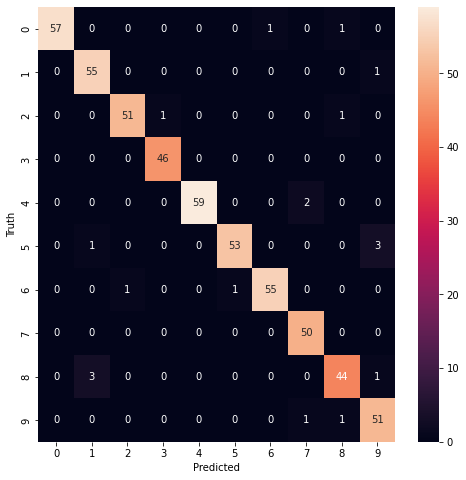

In [98]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 作業：查看錯誤識別的數字

(540, 64)
(540,)
[ 11  34  46  49  98 130 162 200 269 273 276 277 365 424 425 428 435 470
 520]
Predicted 4 as 7


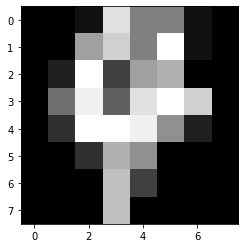

In [99]:
import numpy as np
print(X_test.shape)
print(y_test.shape)

#定義數組下標
i = np.arange(0, len(y_test))
#找到兩個數組不相等元素的下標位置
index = i[y_test != preds]
print(index)

sample = 8
print("Predicted " + str(y_test.values[index[sample]]) + " as " + str(preds[index[sample]]))
plt.imshow((X_test.values[index[sample], :]).reshape((8,8)), cmap='gray')

In [100]:
!pip install pandoc

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


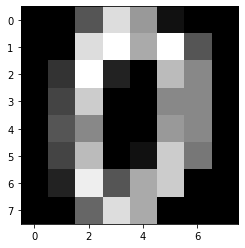

In [101]:
plt.imshow(digits.images[0])

In [102]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
import torch.utils.data as Data
from random import shuffle

In [103]:
#X, y = load_digits(return_X_y=True)
 # X.shape:(1797, 64)
 # y.shape:(1797,)
 # type : <class 'numpy.ndarray'>
    
#X_train, X_test, y_train, y_test
#print(X_train.to_numpy())
X_train_ny=X_train.to_numpy()
X_test_ny=X_test.to_numpy()
y_train_ny=y_train.to_numpy()
y_test_ny=y_test.to_numpy()
#for x in X_train_ny:
#    print(x)
X_train_ny_3d = [x.reshape([1, 8, 8]).tolist() for x in X_train_ny]
X_test_ny_3d = [x.reshape([1, 8, 8]).tolist() for x in X_test_ny]

#X = [x.reshape([1, 8, 8]).tolist() for x in X]
# 原数据可能会把相近的类别放在一起，所以分割数据前最好要打乱
#choose_index = np.arange(1797)
#shuffle(choose_index)

 # 转换成tensor
X_train_ny_3d_t = torch.tensor(X_train_ny_3d, dtype=torch.float32)
X_test_ny_3d_t = torch.tensor(X_test_ny_3d, dtype=torch.float32)
y_train_ny_t = torch.tensor(y_train_ny, dtype=torch.int64)
y_test_ny_t = torch.tensor(y_test_ny, dtype=torch.int64)

 # 将数据和标签整合在一起
train_data = Data.TensorDataset(X_train_ny_3d_t, y_train_ny_t)
test_data = Data.TensorDataset(X_test_ny_3d_t,   y_test_ny_t)

 # 构建数据加载器
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=64,
    shuffle=True,
    num_workers=0
)

test_loader = Data.DataLoader(
    dataset=test_data,
    batch_size=64,
    shuffle=True,
    num_workers=0
)


In [104]:
# 定义网络
class CNNClassifier(nn.Module):
    def __init__(self, input_channels, output_dim):
        super(CNNClassifier, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels=input_channels,
                      out_channels=16,
                      kernel_size=3,
                      stride=1,
                      padding=1),               # [B, 16, 8, 8]
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, 2, 1),    # [B, 32, 4, 4]
            nn.ReLU(),
            nn.Conv2d(32, 16, 3, 2, 1),    # [B, 16, 2, 2]
            nn.ReLU(),
            nn.Conv2d(16, 8, 3, 1, 1)       # [B, 8, 2, 2]
        )
        self.output = nn.Linear(32, 10)
    def forward(self, x):
        out = self.conv(x)
         # out : [B, 8, 2, 2]
        out = self.output(out.flatten(start_dim=1))
        out = nn.functional.softmax(out, dim=1)
        return out


In [105]:
net = CNNClassifier(input_channels=1, output_dim=10)

In [106]:
 # 获取优化器
optimizer = torch.optim.RMSprop(net.parameters(), lr=0.001)
 # 获取损失函数
loss_func = nn.CrossEntropyLoss(reduction="mean")
 # 记录损失
train_loss, train_acc = [], []
test_loss, test_acc = [], []

[0.6421130952380952, 0.8053075396825397, 0.8603670634920635, 0.8625992063492063, 0.8690476190476191, 0.876984126984127, 0.873015873015873, 0.8687996031746033, 0.8809523809523809, 0.8782242063492063, 0.9365079365079365, 0.9330357142857143, 0.9434523809523809, 0.9508928571428571, 0.9595734126984126, 0.9548611111111112, 0.9625496031746033, 0.9652777777777778, 0.9618055555555556, 0.9630456349206349, 0.9613095238095237, 0.9647817460317459, 0.9642857142857143, 0.9625496031746033, 0.9625496031746033, 0.9665178571428571, 0.9699900793650793, 0.953125, 0.9122023809523809, 0.9248511904761904, 0.9722222222222222, 0.9451884920634921, 0.9652777777777778, 0.9722222222222222, 0.9717261904761904, 0.9665178571428571, 0.9665178571428571, 0.96875, 0.9699900793650793, 0.9670138888888888]


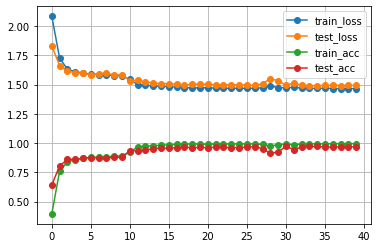

In [107]:
# 开始训练
for epoch in range(40):
     # 遍历生成器
    net.train()
    epoch_loss, epoch_acc = [], []  # 记录当前epoch的loss和accuracy
    for batch in train_loader:
        data, label = batch
         # 前向传播
        output = net(data)
         # 预测标签
        predict_label = torch.argmax(output, dim=1)
         # 计算损失
        loss = loss_func(output, label)
         # 梯度清空
        optimizer.zero_grad()
         # 反向传播
        loss.backward()
         # 更新参数
        optimizer.step()

         # 记录训练结果
        epoch_loss.append(loss.item())
        epoch_acc.append(accuracy_score(predict_label, label))

    train_loss.append(np.mean(epoch_loss))
    train_acc.append(np.mean(epoch_acc))

     # 遍历测试集
    net.eval()
    epoch_loss, epoch_acc = [], []
    for batch in test_loader:
        data, label = batch
        output = net(data)
        predict_label = torch.argmax(output, dim=1)
        loss = loss_func(output, label)
        epoch_loss.append(loss.item())
        epoch_acc.append(accuracy_score(predict_label, label))

    test_loss.append(np.mean(epoch_loss))
    test_acc.append(np.mean(epoch_acc))

 # 可视化数据
print(test_acc)
label_name = ["train_loss", "test_loss", "train_acc", "test_acc"]
for index, name in enumerate([train_loss, test_loss, train_acc, test_acc]):
    plt.plot(name, "o-", label=label_name[index])

plt.legend()
plt.grid(True)
plt.show()
